In [1]:
pip list

Package                                  VersionNote: you may need to restart the kernel to use updated packages.

---------------------------------------- ------------
absl-py                                  2.0.0
accelerate                               0.25.0
adagio                                   0.2.4
aiofiles                                 23.2.1
aiohttp                                  3.9.0
aiosignal                                1.3.1
alembic                                  1.12.1
altair                                   4.2.2
anaconda                                 0.0.1.1
ansi2html                                1.8.0
antlr4-python3-runtime                   4.11.1
anyio                                    3.7.1
appdirs                                  1.4.4
argon2-cffi                              23.1.0
argon2-cffi-bindings                     21.2.0
arrow                                    1.3.0
asgiref                                  3.7.2
asttokens               

## Import librairies

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8579,8580,15702277,Smith,650,France,Male,34,4,106005.54,1,0,1,142995.32,0
6434,6435,15703167,Rouse,628,France,Female,45,8,0.00,2,1,0,193903.06,0
7941,7942,15583755,McClemans,592,Germany,Male,33,2,156570.86,1,1,1,37140.20,0
8455,8456,15692207,Ingle,609,France,Female,53,6,0.00,2,1,1,124218.27,0
2007,2008,15727384,Chukwuemeka,705,Germany,Female,43,10,146547.78,1,0,1,10072.55,1


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [5]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

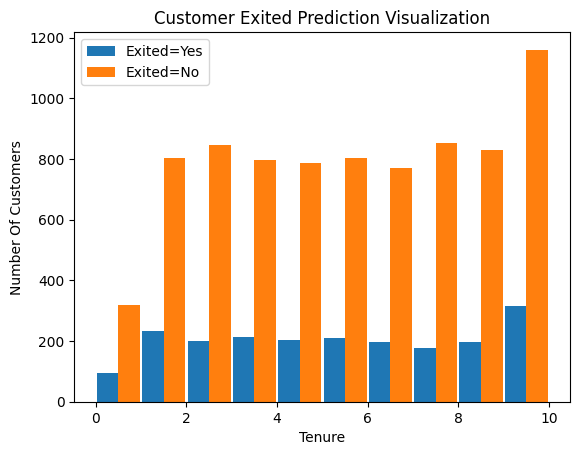

In [8]:
tenure_exited_no = df[df.Exited==0].Tenure
tenure_exited_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualization")

#blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
#blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_exited_yes, tenure_exited_no], rwidth=0.95,label=['Exited=Yes','Exited=No'])
plt.legend()

In [16]:
df.shape

(10000, 12)

In [9]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [10]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [11]:
df2 = pd.get_dummies(data=df, columns=['Geography','Gender'])
df2.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [12]:
cols_to_scale = ['CreditScore','Age','Balance','EstimatedSalary','Tenure']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [13]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [14]:
X = df2.drop('Exited',axis='columns')
y = df2['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [17]:
X_train.shape

(8000, 13)

In [18]:
X_test.shape

(2000, 13)

In [16]:
len(X_train.columns)

13

In [31]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    keras.layers.Dense(9, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#opt = keras.optimizers.SGD(learning_rate=0.01)

#model.compile(optimizer='sgd',
         #     loss='binary_crossentropy',
          #    metrics=['accuracy'])

#model.fit(X_train, y_train, epochs=150)

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=120)

Epoch 1/120
250/250 [==============================] - 2s 4ms/step - loss: 0.4469 - accuracy: 0.8083
Epoch 2/120
250/250 [==============================] - 1s 4ms/step - loss: 0.3769 - accuracy: 0.8379
Epoch 3/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8479
Epoch 4/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3622 - accuracy: 0.8493
Epoch 5/120
250/250 [==============================] - 1s 4ms/step - loss: 0.3621 - accuracy: 0.8476
Epoch 6/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3601 - accuracy: 0.8503
Epoch 7/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3548 - accuracy: 0.8529
Epoch 8/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8524
Epoch 9/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3478 - accuracy: 0.8546
Epoch 10/120
250/250 [==============================] - 1s 3ms/step - loss: 0.3498 - accura

In [32]:
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.02494427],
       [0.04500214],
       [0.04815457],
       [0.04370284],
       [0.06672323]], dtype=float32)

In [33]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [34]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1595
           1       0.74      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

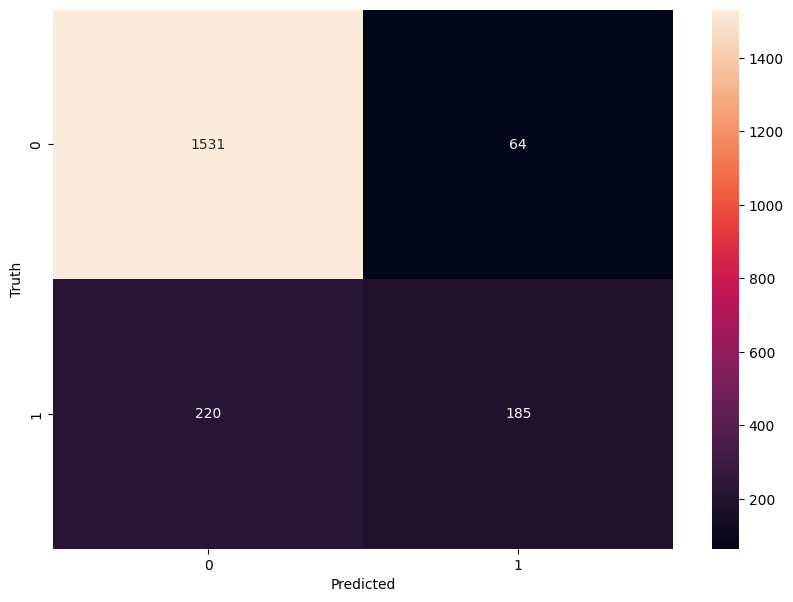

In [35]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')